In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Setting the format of float
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


# Data Exploratory Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


* `Description` has 2928 missing values (~0.557%).
* `Customer ID` has 107927 missing values (~20.539%).

In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


* `Quantity` has a min value of -9600, and a max value of 19152.
* `Price` has a min value of -53594.36.

In [5]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.00,525461,522533,525461.00,525461,525461.00,417534.00,525461
unique,28816.00,4632,4681,NaN,NaN,NaN,NaN,40
top,537434.00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,675.00,3516,3549,NaN,NaN,NaN,NaN,485852
mean,NaN,NaN,NaN,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65,NaN
min,NaN,NaN,NaN,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00,NaN
25%,NaN,NaN,NaN,1.00,2010-03-21 12:20:00,1.25,13983.00,NaN
50%,NaN,NaN,NaN,3.00,2010-07-06 09:51:00,2.10,15311.00,NaN
75%,NaN,NaN,NaN,10.00,2010-10-15 12:45:00,4.21,16799.00,NaN
max,NaN,NaN,NaN,19152.00,2010-12-09 20:01:00,25111.09,18287.00,NaN


In [6]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
df['Invoice'] = df['Invoice'].astype(str)
df[df['Invoice'].str.match('^\\d{6}$') == False].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [9]:
df['Invoice'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df['Invoice'].str.startswith('A')].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
df['StockCode'] = df['StockCode'].astype(str)
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
df[(df['StockCode'].str.match('^POST$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.00,12490.00,France
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [13]:
df[(df['StockCode'].str.match('^D$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.00,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.00,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.00,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.00,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.00,United Kingdom


In [14]:
df[(df['StockCode'].str.match('^DCGS0058$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [15]:
df[(df['StockCode'].str.match('^DCGS0068$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [16]:
df[(df['StockCode'].str.match('^DOT$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [17]:
df[(df['StockCode'].str.match('^M$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.00,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.00,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.00,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.00,United Kingdom
17887,490881,M,Manual,1,2009-12-08 12:58:00,10.00,16210.00,United Kingdom
...,...,...,...,...,...,...,...,...
516892,537435,M,Manual,2,2010-12-06 16:58:00,5.95,17920.00,United Kingdom
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.00,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.00,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.00,United Kingdom


In [18]:
df[(df['StockCode'].str.match('^DCGS0004$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [19]:
df[(df['StockCode'].str.match('^DCGS0076$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [20]:
df[(df['StockCode'].str.match('^C2$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.00,14156.00,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.00,EIRE
515057,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.00,14911.00,EIRE
515390,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.00,14911.00,EIRE
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.00,13369.00,United Kingdom


In [21]:
df[(df['StockCode'].str.match('^BANK CHARGES$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.00,17539.00,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.00,12843.00,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.00,17448.00,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.00,17448.00,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.00,17448.00,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.00,17032.00,United Kingdom
240612,512658,BANK CHARGES,Bank Charges,1,2010-06-17 11:24:00,15.00,14085.00,United Kingdom
272460,515845,BANK CHARGES,Bank Charges,1,2010-07-15 11:21:00,15.00,14606.00,United Kingdom


In [22]:
df[(df['StockCode'].str.match('^DCGS0003$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [23]:
df[(df['StockCode'].str.match('^TEST001$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.00,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.00,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.00,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.00,14103.00,United Kingdom
89180,497843,TEST001,This is a test product.,5,2010-02-12 15:47:00,0.00,14827.00,United Kingdom


In [24]:
df[(df['StockCode'].str.match('^gift_0001_80$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [25]:
df[(df['StockCode'].str.match('^DCGS0072$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [26]:
df[(df['StockCode'].str.match('^gift_0001_20$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [27]:
df[(df['StockCode'].str.match('^DCGS0044$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [28]:
df[(df['StockCode'].str.match('^TEST002$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom


In [29]:
df[(df['StockCode'].str.match('^gift_0001_10$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [30]:
df[(df['StockCode'].str.match('^gift_0001_50$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [31]:
df[(df['StockCode'].str.match('^DCGS0066N$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [32]:
df[(df['StockCode'].str.match('^gift_0001_30$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [33]:
df[(df['StockCode'].str.match('^PADS$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [34]:
df[(df['StockCode'].str.match('^ADJUST$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.00,Spain
70985,495742,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:25:00,63.24,12404.00,Finland
71022,495745,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,56.73,12466.00,France
71023,495748,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,117.72,16291.00,Portugal
71033,495747,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,129.23,12555.00,Spain
71034,495750,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:27:00,132.79,14156.00,EIRE
71037,495756,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:29:00,39.67,14912.00,Italy


In [35]:
df[(df['StockCode'].str.match('^gift_0001_40$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [36]:
df[(df['StockCode'].str.match('^gift_0001_60$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [37]:
df[(df['StockCode'].str.match('^gift_0001_70$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [38]:
df[(df['StockCode'].str.match('^gift_0001_90$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [39]:
df[(df['StockCode'].str.match('^DCGSSGIRL$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [40]:
df[(df['StockCode'].str.match('^DCGS0006$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [41]:
df[(df['StockCode'].str.match('^DCGS0016$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [42]:
df[(df['StockCode'].str.match('^DCGS0027$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [43]:
df[(df['StockCode'].str.match('^DCGS0036$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [44]:
df[(df['StockCode'].str.match('^DCGS0039$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [45]:
df[(df['StockCode'].str.match('^DCGS0060$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [46]:
df[(df['StockCode'].str.match('^DCGS0056$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [47]:
df[(df['StockCode'].str.match('^DCGS0059$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [48]:
df[(df['StockCode'].str.match('^GIFT$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [49]:
df[(df['StockCode'].str.match('^DCGSLBOY$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [50]:
df[(df['StockCode'].str.match('^m$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [51]:
df[(df['StockCode'].str.match('^DCGS0053$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [52]:
df[(df['StockCode'].str.match('^DCGS0062$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [53]:
df[(df['StockCode'].str.match('^DCGS0037$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [54]:
df[(df['StockCode'].str.match('^DCGSSBOY$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [55]:
df[(df['StockCode'].str.match('^DCGSLGIRL$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [56]:
df[(df['StockCode'].str.match('^S$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [57]:
df[(df['StockCode'].str.match('^DCGS0069$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [58]:
df[(df['StockCode'].str.match('^DCGS0070$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [59]:
df[(df['StockCode'].str.match('^DCGS0075$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [60]:
df[(df['StockCode'].str.match('^B$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [61]:
df[(df['StockCode'].str.match('^DCGS0041$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [62]:
df[(df['StockCode'].str.match('^ADJUST2$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.45,16422.00,United Kingdom


In [63]:
df[(df['StockCode'].str.match('^47503J$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-07 15:26:00,7.95,17841.00,United Kingdom
28428,491758,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-14 12:24:00,7.95,17908.00,United Kingdom
28557,491782,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-14 12:48:00,7.95,15534.00,United Kingdom
35130,492319,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-16 12:17:00,7.95,15499.00,United Kingdom
46697,493709,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,24,2010-01-05 15:55:00,3.95,17754.00,United Kingdom
48188,493877,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,2010-01-07 19:34:00,7.95,14911.00,EIRE
48313,493887,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,24,2010-01-08 10:34:00,6.35,17457.00,United Kingdom
49044,493975,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,2010-01-10 11:27:00,7.95,12540.00,Spain
67023,495357,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,2,2010-01-24 11:35:00,7.95,14879.00,United Kingdom
91156,497955,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,4,2010-02-15 12:54:00,7.95,14543.00,United Kingdom


In [64]:
df[(df['StockCode'].str.match('^C3$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [65]:
df[(df['StockCode'].str.match('^SP1002$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom


In [66]:
df[(df['StockCode'].str.match('^AMAZONFEE$')) & (df['Quantity'] >= 0) & (df['Customer ID'].notna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


| StockCode |  State   |            Description             |
|:---------:|:--------:|:----------------------------------:|
|   POST    |  Valid   |              Postage               |
|     D     |  Valid   |              Discount              |
| DCGS0058  | Invalid  |          Miso Pretty Gum           |
| DCGS0068  | Invalid  |                 -                  |
|    DOT    | Invalid  |                 -                  |
|     M     |  Valid   |               Manual               |
| DCGS0075  | Invalid  |        CAMOUFLAGUE DOG LEAD        |
|     B     | Invalid  |          Adjust bad debt           |
| DCGS0041  | Invalid  |  HAYNES MINI-COOPER PLAYING CARDS  |
|  ADJUST2  |  Valid   | Adjustment by Peter on Jun 25 2010 |
|  47503J   |  Valid   |  SET/3 FLORAL GARDEN TOOLS IN BAG  |
|    C3     | Invalid  |                 -                  |
|  SP1002   |  Valid   |       KID'S CHALKBOARD/EASEL       |
| AMAZONFEE | Invalid  |             AMAZON FEE             |

# Data Cleaning

In [67]:
cleaned_df = df.copy()

In [68]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype(str)
cleaned_df = cleaned_df[cleaned_df['Invoice'].str.match('^\\d{6}$') == True]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [69]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype(str)
cleaned_df = cleaned_df[(cleaned_df['StockCode'].str.match('^\\d{5}') == True) | (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True) | (cleaned_df['StockCode'].str.match('^PADS$') == True)]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [70]:
cleaned_df.dropna(subset=['Customer ID'], inplace=True)

C:\Users\NHAT CUONG\AppData\Local\Temp\ipykernel_8696\1450723043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'], inplace=True)


In [71]:
cleaned_df[cleaned_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [72]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [73]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [74]:
cleaned_df['Price'].min()

0.001

In [75]:
len(cleaned_df) / len(df) * 100

77.32429238325965

We drop ~22.68% data after cleaning process.

# Feature Engineering

In [76]:
cleaned_df['Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df.head(10)

C:\Users\NHAT CUONG\AppData\Local\Temp\ipykernel_8696\3542077918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom,45.00


In [77]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        Monetary = ('Sales', 'sum'),
        Frequency = ('Invoice', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max')
    )

aggregated_df.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [78]:
aggregated_df['Recency'] = (aggregated_df['LastInvoiceDate'].max() - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


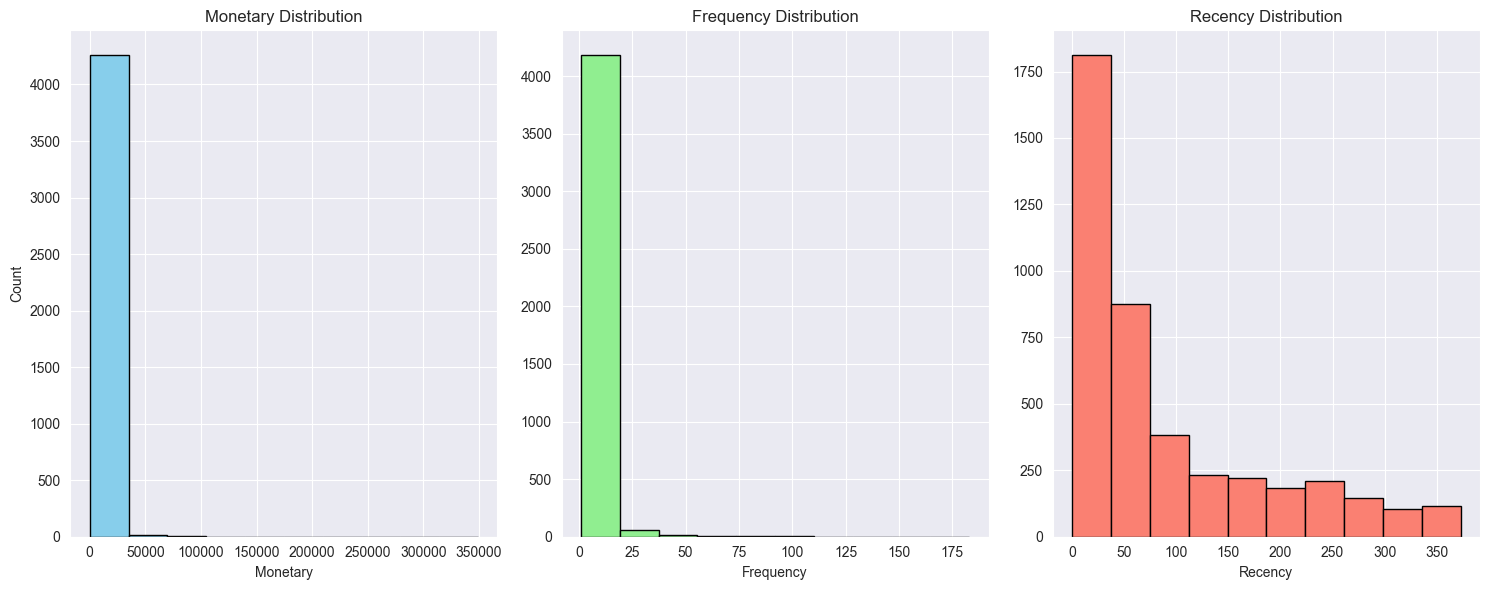

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].hist(x=aggregated_df['Monetary'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Monetary Distribution')
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Count')

axes[1].hist(x=aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')

axes[2].hist(x=aggregated_df['Recency'], bins=10, color='salmon', edgecolor='black')
axes[2].set_title('Recency Distribution')
axes[2].set_xlabel('Recency')

plt.tight_layout()
plt.show()

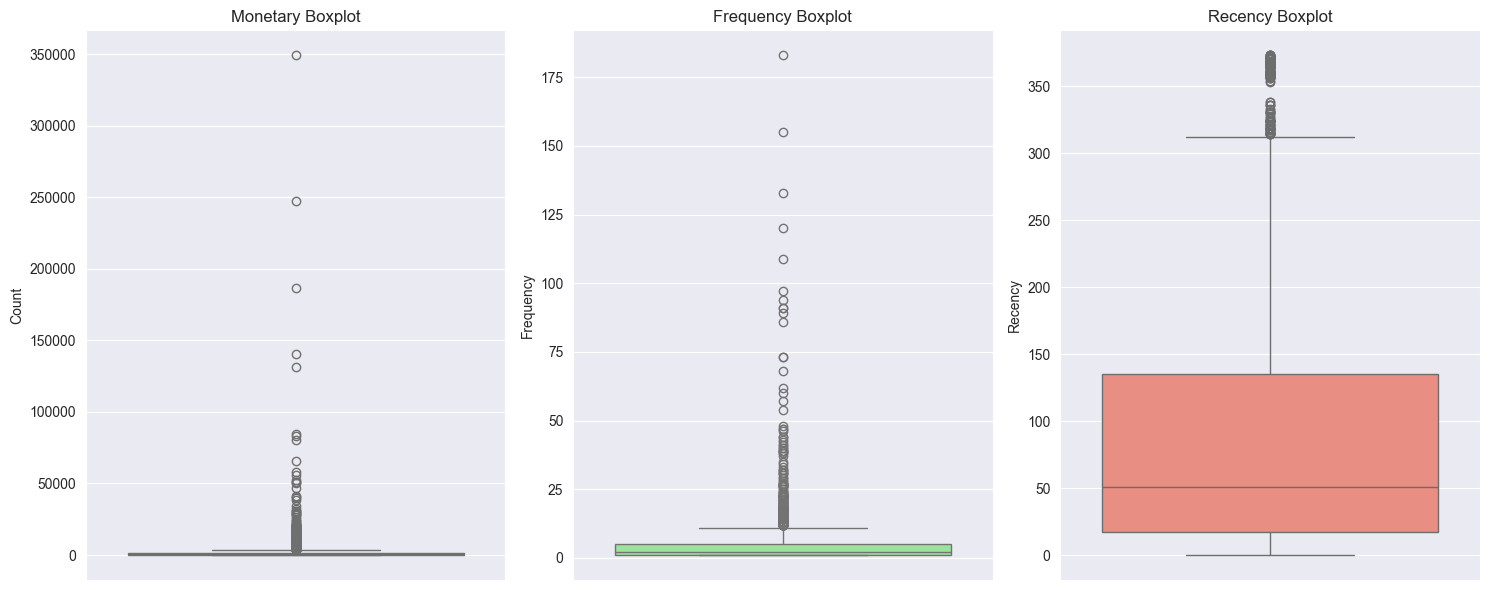

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

sns.boxplot(data=aggregated_df['Monetary'], color='skyblue', ax=axes[0])
axes[0].set_title('Monetary Boxplot')
axes[0].set_ylabel('Count')

sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen', ax=axes[1])
axes[1].set_title('Frequency Boxplot')

sns.boxplot(data=aggregated_df['Recency'], color='salmon', ax=axes[2])
axes[2].set_title('Recency Boxplot')

plt.tight_layout()
plt.show()

In [81]:
m_q1 = aggregated_df['Monetary'].quantile(0.25)
m_q3 = aggregated_df['Monetary'].quantile(0.75)
m_iqr = m_q3 - m_q1
monetary_outliers = aggregated_df[(aggregated_df['Monetary'] < m_q1 - m_iqr * 1.5) | (aggregated_df['Monetary'] > m_q3 + m_iqr * 1.5)]
monetary_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [82]:
f_q1 = aggregated_df['Frequency'].quantile(0.25)
f_q3 = aggregated_df['Frequency'].quantile(0.75)
f_iqr = f_q3 - f_q1
frequency_outliers = aggregated_df[(aggregated_df['Frequency'] < f_q1 - f_iqr * 1.5) | (aggregated_df['Frequency'] > f_q3 + f_iqr * 1.5)]
frequency_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [83]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) & (~aggregated_df.index.isin(frequency_outliers.index))]
non_outliers_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


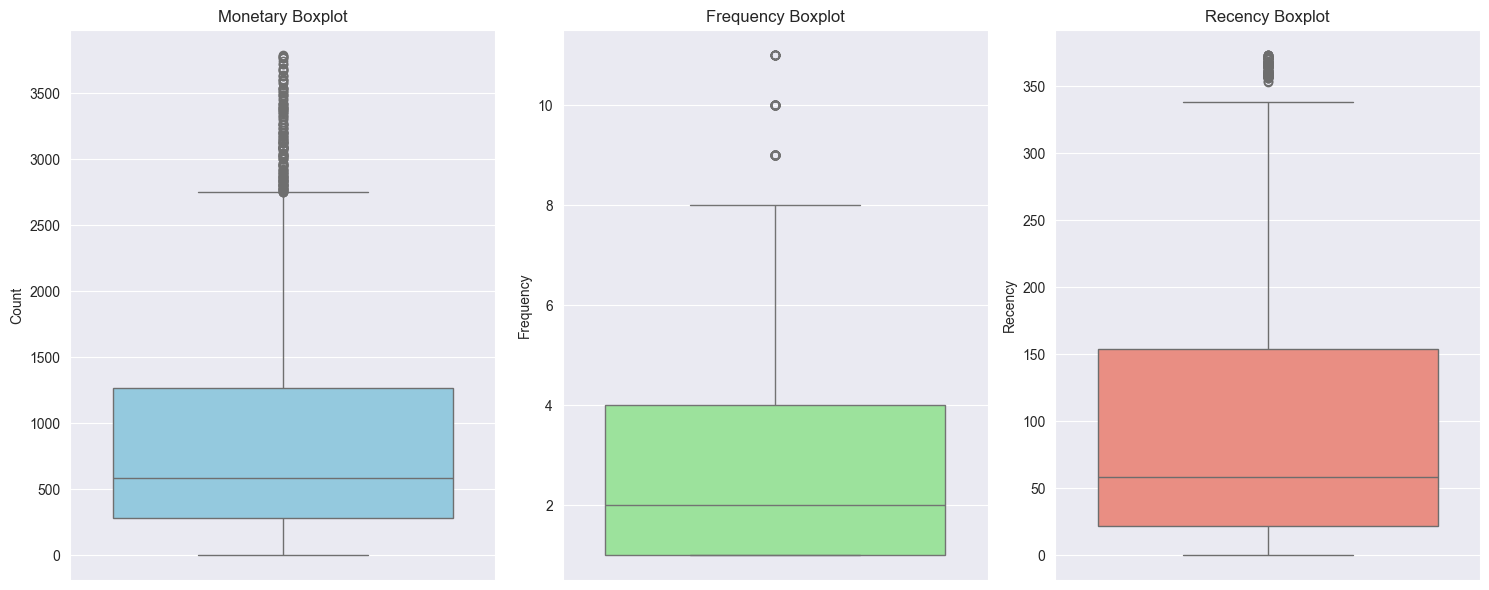

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

sns.boxplot(data=non_outliers_df['Monetary'], color='skyblue', ax=axes[0])
axes[0].set_title('Monetary Boxplot')
axes[0].set_ylabel('Count')

sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen', ax=axes[1])
axes[1].set_title('Frequency Boxplot')

sns.boxplot(data=non_outliers_df['Recency'], color='salmon', ax=axes[2])
axes[2].set_title('Recency Boxplot')

plt.tight_layout()
plt.show()

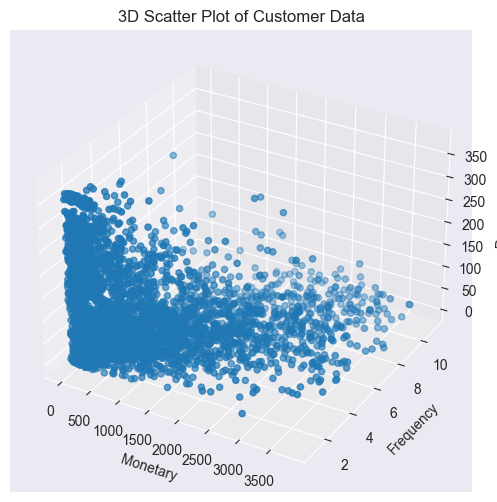

In [85]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'])
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [86]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['Monetary', 'Frequency', 'Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [87]:
scaled_data_df = pd.DataFrame(data=scaled_data, columns=['Monetary', 'Frequency', 'Recency'])
scaled_data_df

,Monetary,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
3804,-0.30,1.40,-0.82
3805,-0.58,-0.83,-0.32
3806,-0.62,-0.83,2.02
3807,0.44,-0.38,0.14


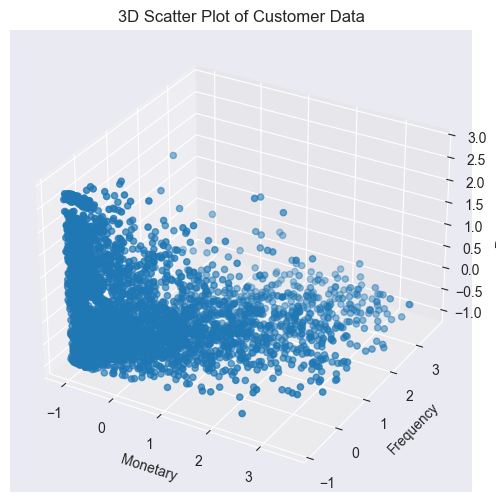

In [88]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(scaled_data_df['Monetary'], scaled_data_df['Frequency'], scaled_data_df['Recency'])
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# KMeans Clustering

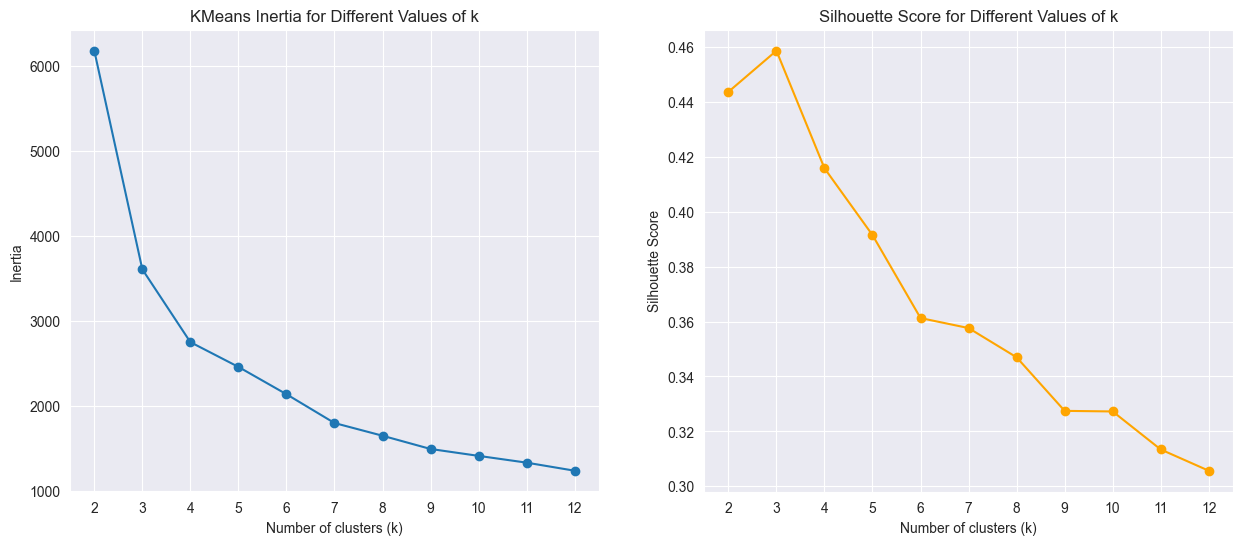

In [89]:
inertias = []
silhouette_scores = []
k_values = range(2, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    silhouette_scores.append(silhouette_score(scaled_data_df, cluster_labels))
    inertias.append(kmeans.inertia_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(k_values, inertias, marker='o')
axes[0].set_title('KMeans Inertia for Different Values of k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(ticks=k_values)

axes[1].plot(k_values, silhouette_scores, marker='o', color='orange')
axes[1].set_title('Silhouette Score for Different Values of k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(ticks=k_values)

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=2, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 0, 1, ..., 2, 0, 0])

In [91]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

C:\Users\NHAT CUONG\AppData\Local\Temp\ipykernel_8696\87441802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,1
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,2
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


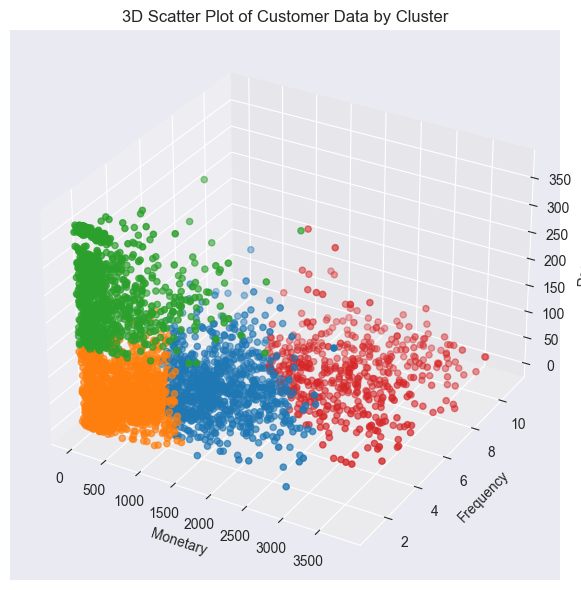

In [96]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker='o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.tight_layout()
plt.show()

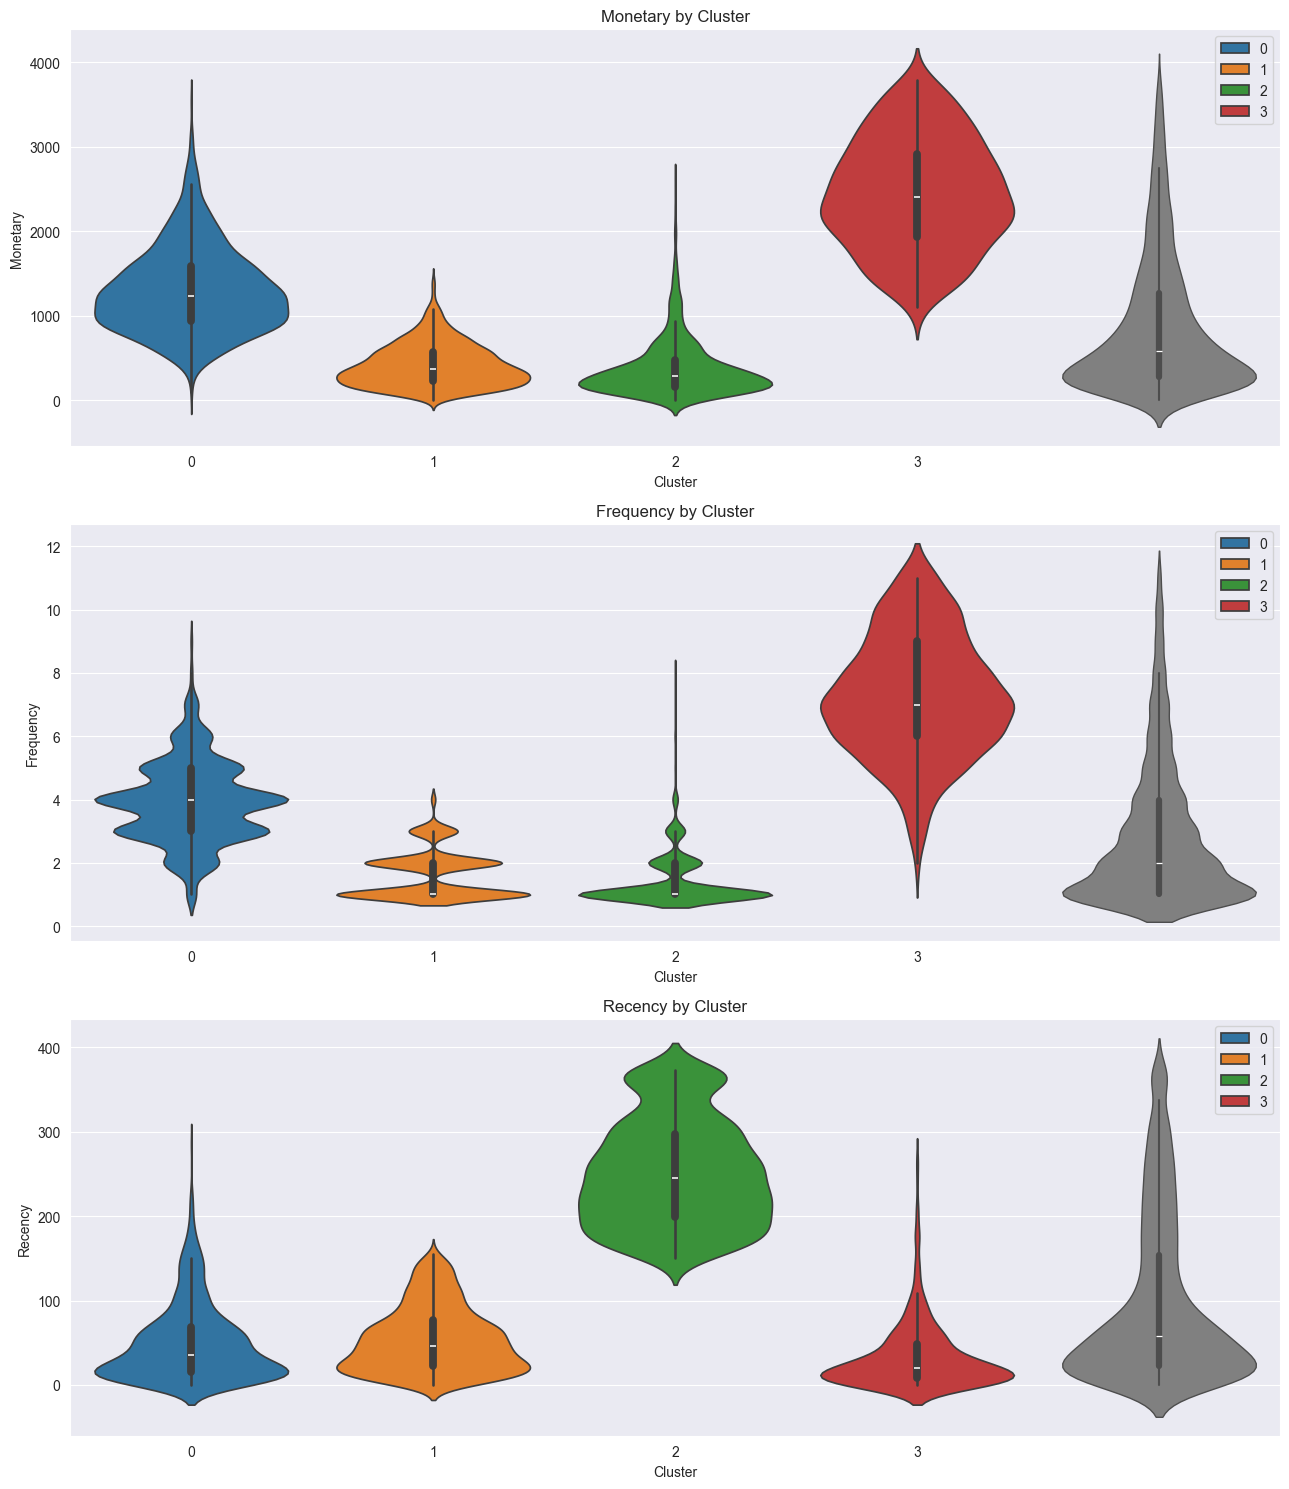

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 15))

sns.violinplot(x= non_outliers_df['Cluster'], y=non_outliers_df['Monetary'], palette=cluster_colors, hue=non_outliers_df['Cluster'], ax=axes[0])
sns.violinplot(y=non_outliers_df['Monetary'], color='gray', linewidth=1, ax=axes[0])
axes[0].set_title('Monetary by Cluster')
axes[0].set_ylabel('Monetary')

sns.violinplot(x= non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'], ax=axes[1])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1, ax=axes[1])
axes[1].set_title('Frequency by Cluster')
axes[1].set_ylabel('Frequency')

sns.violinplot(x= non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'], ax=axes[2])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1, ax=axes[2])
axes[2].set_title('Recency by Cluster')
axes[2].set_ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-engage"
* Rationale: This group includes lower-value, infrequent buyers who have not purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.